In [26]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
import platform



if platform.system() == 'Darwin':
    plt.rcParams["font.family"] = 'Arial Unicode MS'
elif platform.system() == 'Windows':
    plt.rcParams["font.family"] = 'SimHei'
else:
    pass

In [15]:
china_full_map = gpd.read_file(filename="数据集/100000_中华人民共和国_full.json")
china_full_map['geometry'] = china_full_map.buffer(0)
china_full_map.head()

,adcode,name,childrenNum,level,parent,subFeatureIndex,adchar,geometry
0,110000,北京市,16.0,province,{'adcode': 100000},0.0,None,"POLYGON ((115.72253 39.54420, 115.72068 39.551..."
1,120000,天津市,16.0,province,{'adcode': 100000},1.0,None,"POLYGON ((116.91253 39.11090, 116.90945 39.150..."
2,130000,河北省,11.0,province,{'adcode': 100000},2.0,None,"MULTIPOLYGON (((115.72253 39.54420, 115.72253 ..."
3,140000,山西省,11.0,province,{'adcode': 100000},3.0,None,"POLYGON ((110.37926 34.60061, 110.29549 34.610..."
4,150000,内蒙古自治区,12.0,province,{'adcode': 100000},4.0,None,"POLYGON ((97.17290 42.79526, 97.28254 42.78208..."


In [16]:
china_full_map.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
china_boundary = gpd.read_file(filename="数据集/中国地图边界202111版.json")
china_boundary['geometry'] = china_boundary.buffer(0)
china_boundary

,adcode,name,childrenNum,level,parent,geometry
0,100000,中华人民共和国,34,country,{'adcode': None},"MULTIPOLYGON (((110.43346 21.17128, 110.43161 ..."


In [18]:
china_boundary.bounds

,minx,miny,maxx,maxy
0,73.502355,3.397162,135.09567,53.563269


In [19]:
china_boundary.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
china_boundary.centroid[0].x

<ipython-input-20-471a3ff5e333>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  china_boundary.centroid[0].x


103.87428753932441

In [21]:
lambert_ccrs = ccrs.LambertConformal(central_longitude=china_boundary.centroid[0].x,
                                     central_latitude=china_boundary.centroid[0].y)

<ipython-input-21-0ff197c35e9a>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lambert_ccrs = ccrs.LambertConformal(central_longitude=china_boundary.centroid[0].x,
<ipython-input-21-0ff197c35e9a>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  central_latitude=china_boundary.centroid[0].y)


In [23]:
china_boundary_lambert = china_boundary.to_crs(lambert_ccrs.proj4_init)
china_boundary_lambert

,adcode,name,childrenNum,level,parent,geometry
0,100000,中华人民共和国,34,country,{'adcode': None},"MULTIPOLYGON (((708591.435 -1686525.898, 70831..."


In [25]:
china_full_map_lambert = china_full_map.to_crs(lambert_ccrs.proj4_init)
china_full_map_lambert

,adcode,name,childrenNum,level,parent,subFeatureIndex,adchar,geometry
0,110000,北京市,16.0,province,{'adcode': 100000},0.0,None,"POLYGON ((1010065.805 410511.861, 1009809.797 ..."
1,120000,天津市,16.0,province,{'adcode': 100000},1.0,None,"POLYGON ((1117689.112 377046.522, 1116796.758 ..."
2,130000,河北省,11.0,province,{'adcode': 100000},2.0,None,"MULTIPOLYGON (((1010065.805 410511.861, 101007..."
3,140000,山西省,11.0,province,{'adcode': 100000},3.0,None,"POLYGON ((594710.091 -180270.638, 586983.800 -..."
4,150000,内蒙古自治区,12.0,province,{'adcode': 100000},4.0,None,"POLYGON ((-545920.172 724080.488, -537110.252 ..."
5,210000,辽宁省,14.0,province,{'adcode': 100000},5.0,None,"MULTIPOLYGON (((1661926.415 552013.577, 166122..."
6,220000,吉林省,9.0,province,{'adcode': 100000},6.0,None,"POLYGON ((2081580.141 958504.624, 2079549.326 ..."
7,230000,黑龙江省,13.0,province,{'adcode': 100000},7.0,None,"POLYGON ((1511498.262 1249096.600, 1505333.756..."
8,310000,上海市,16.0,province,{'adcode': 100000},8.0,None,"MULTIPOLYGON (((1700314.150 -393115.675, 16989..."
9,320000,江苏省,13.0,province,{'adcode': 100000},9.0,None,"POLYGON ((1225705.940 -115085.855, 1226517.993..."


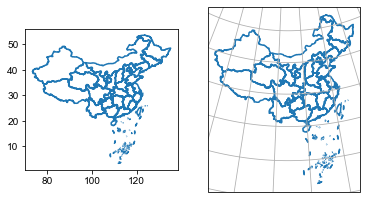

In [47]:
ax1 = plt.subplot(121)
china_full_map.boundary.plot(ax=ax1)
ax2 = plt.subplot(122, projection=lambert_ccrs)
china_full_map_lambert.boundary.plot(ax=ax2)
ax2.gridlines()


In [57]:
sample_data = pd.DataFrame({'lon':np.linspace(start=100, stop=105, num=100),
                            'lat':np.linspace(start=30, stop=40, num=100),
                            'show_value':np.random.rand(100)})


In [58]:
print(china_boundary.crs)

epsg:4326


In [59]:
sample_data_gpd = gpd.GeoDataFrame(
    sample_data,
    geometry=gpd.points_from_xy(x=sample_data['lon'], y=sample_data['lat']),
    crs='epsg:4326'#china_boundary.crs
)
sample_data_gpd

,lon,lat,show_value,geometry
0,100.000000,30.00000,0.318872,POINT (100.00000 30.00000)
1,100.050505,30.10101,0.537263,POINT (100.05051 30.10101)
2,100.101010,30.20202,0.080641,POINT (100.10101 30.20202)
3,100.151515,30.30303,0.807711,POINT (100.15152 30.30303)
4,100.202020,30.40404,0.611667,POINT (100.20202 30.40404)
...,...,...,...,...
95,104.797980,39.59596,0.712343,POINT (104.79798 39.59596)
96,104.848485,39.69697,0.671649,POINT (104.84848 39.69697)
97,104.898990,39.79798,0.229778,POINT (104.89899 39.79798)
98,104.949495,39.89899,0.835487,POINT (104.94949 39.89899)


In [60]:
sample_data_gpd = sample_data_gpd.to_crs(lambert_ccrs.proj4_init)
sample_data_gpd

,lon,lat,show_value,geometry
0,100.000000,30.00000,0.318872,POINT (-376175.944 -704516.296)
1,100.050505,30.10101,0.537263,POINT (-370800.970 -693464.043)
2,100.101010,30.20202,0.080641,POINT (-365438.512 -682411.312)
3,100.151515,30.30303,0.807711,POINT (-360088.566 -671358.083)
4,100.202020,30.40404,0.611667,POINT (-354751.129 -660304.333)
...,...,...,...,...
95,104.797980,39.59596,0.712343,POINT (78909.092 350688.344)
96,104.848485,39.69697,0.671649,POINT (83103.897 361886.987)
97,104.898990,39.79798,0.229778,POINT (87286.274 373088.295)
98,104.949495,39.89899,0.835487,POINT (91456.221 384292.293)


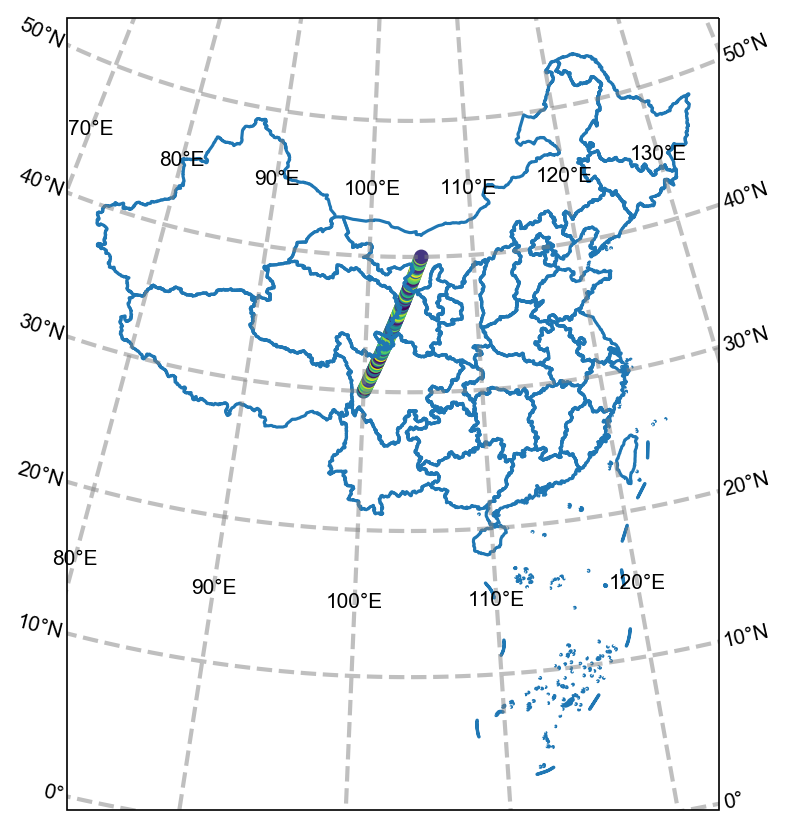

In [64]:
fig, ax = plt.subplots(subplot_kw={'projection': lambert_ccrs}, figsize=(7,7), dpi=150)
sample_data_gpd.plot(ax=ax, column='show_value')
china_full_map_lambert.boundary.plot(ax=ax)
ax.gridlines(draw_labels=True,
             linewidth=2, color='gray', alpha=0.5, linestyle='--')